In [10]:
!mlflow --version

mlflow, version 2.22.0


In [11]:
!mkdir datasets

In [12]:
# jan_ytaxi = 
!wget -O ./datasets/yellow_tripdata_2023-01.parquet https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet
!wget -O ./datasets/yellow_tripdata_2023-02.parquet https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet
!wget -O ./datasets/yellow_tripdata_2023-03.parquet https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-03.parquet

--2025-05-26 23:11:44--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 

2600:9000:21f8:d400:b:20a5:b140:21, 2600:9000:21f8:f000:b:20a5:b140:21, 2600:9000:21f8:4e00:b:20a5:b140:21, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|2600:9000:21f8:d400:b:20a5:b140:21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47673370 (45M) [application/x-www-form-urlencoded]
Saving to: ‘./datasets/yellow_tripdata_2023-01.parquet’

./datasets/yellow_t 100%[===================>]  45.46M  3.14MB/s    in 14s     

2025-05-26 23:12:00 (3.25 MB/s) - ‘./datasets/yellow_tripdata_2023-01.parquet’ saved [47673370/47673370]

--2025-05-26 23:12:00--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 2600:9000:21f8:d400:b:20a5:b140:21, 2600:9000:21f8:f000:b:20a5:b140:21, 2600:9000:21f8:4e00:b:20a5:b140:21, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|2600:9000:21f8:d400:b:20a5:b140:21|:443.

In [ ]:
!wget -O preprocess_data.py https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/refs/heads/main/cohorts/2025/02-experiment-tracking/homework/preprocess_data.py

# changed green to yellow in the file

--2025-05-26 23:03:20--  https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/refs/heads/main/cohorts/2025/02-experiment-tracking/homework/preprocess_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2510 (2.5K) [text/plain]
Saving to: ‘preprocess_data.py’

preprocess_data.py  100%[===================>]   2.45K  --.-KB/s    in 0s      

2025-05-26 23:03:21 (54.6 MB/s) - ‘preprocess_data.py’ saved [2510/2510]



In [13]:
!pwd

/home/bilal326/Desktop/mlops_zoomcamp_25/03_week2_exp_tracking


In [18]:
import pandas as pd
df = pd.read_parquet("./datasets/yellow_tripdata_2023-01.parquet")

In [19]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


- Also changed column names to tpep_dropoff_datetime and tpep_pickup_datetime

In [20]:
!python preprocess_data.py --raw_data_path ./datasets --dest_path ./output

In [22]:
import os

print(os.listdir("./output"))
print(len(os.listdir("./output")))

['test.pkl', 'train.pkl', 'dv.pkl', 'val.pkl']
4


In [23]:
!wget https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/refs/heads/main/cohorts/2025/02-experiment-tracking/homework/train.py

--2025-05-26 23:21:09--  https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/refs/heads/main/cohorts/2025/02-experiment-tracking/homework/train.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8000::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 785 [text/plain]
Saving to: ‘train.py’

train.py            100%[===================>]     785  --.-KB/s    in 0.1s    

2025-05-26 23:21:10 (5.58 KB/s) - ‘train.py’ saved [785/785]



In [29]:
# modified train.py to train_v2

In [33]:
!python train_v2.py --data_path ./output


2025/05/27 00:08:26 INFO mlflow.tracking.fluent: Experiment with name 'Homework_2_experiment_2' does not exist. Creating a new experiment.
2025/05/27 00:08:27 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: Unable to allocate 489. GiB for an array with shape (3009173, 21802) and data type float64
2025/05/27 00:26:22 WARNING mlflow.sklearn: Failed to log evaluation dataset information to MLflow Tracking. Reason: Unable to allocate 464. GiB for an array with shape (2855951, 21802) and data type float64
2025/05/27 00:26:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
# ran the below command in the terminal

# !mlflow server \
#   --backend-store-uri sqlite:///mlflow.db \
#   --default-artifact-root ./artifacts \
#   --host 0.0.0.0 \
#   --port 5000


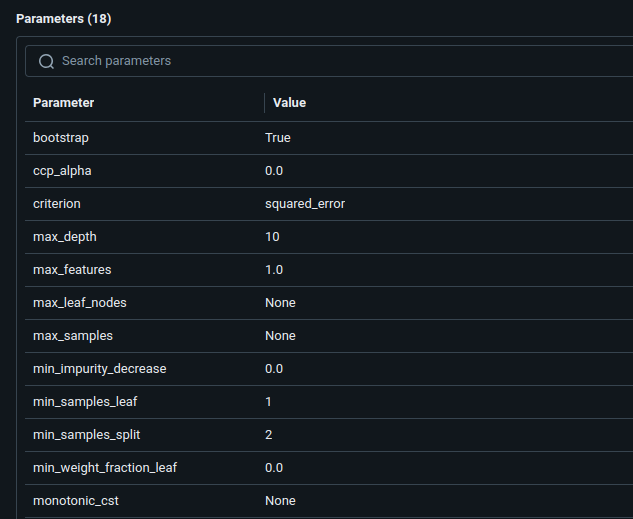

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=10, random_state=0)
rf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [34]:
!wget https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/refs/heads/main/cohorts/2025/02-experiment-tracking/homework/hpo.py

--2025-05-27 08:31:38--  https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/refs/heads/main/cohorts/2025/02-experiment-tracking/homework/hpo.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1836 (1.8K) [text/plain]
Saving to: ‘hpo.py’

hpo.py              100%[===================>]   1.79K  --.-KB/s    in 0.1s    

2025-05-27 08:31:39 (18.7 KB/s) - ‘hpo.py’ saved [1836/1836]



In [35]:
!python hpo.py

2025/05/27 08:37:03 INFO mlflow.tracking.fluent: Experiment with name 'random-forest-hyperopt' does not exist. Creating a new experiment.
  0%|                                    | 0/15 [00:00<?, ?trial/s, best loss=?]^C
